Descripción del Conjunto de Datos:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distributi

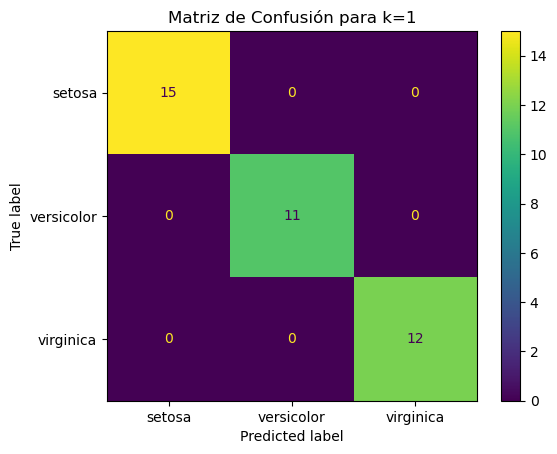

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# • Carga del Conjunto de Datos:
iris_dataset = load_iris()
X = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
y = pd.Series(iris_dataset.target, name='target')

# • Exploración Básica:
print("Descripción del Conjunto de Datos:\n", iris_dataset.DESCR)
print("\nResumen Estadístico de las Características:\n", X.describe())
print("\nInformación del DataFrame X:\n", X.info())

# • División del Conjunto de Datos:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# • Creación del Modelo:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# • Evaluación del Modelo:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print(f"\nTasa de Error (Misclassification Rate): {error_rate:.4f}")
print(f"Precisión del Modelo: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:\n", cm)

# • Visualización:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris_dataset.target_names)
disp.plot()
plt.title(f'Matriz de Confusión para k=1')
plt.show()